In [1]:
import numpy as np

# Set environment variables
import os

os.environ["SCAL_TYPE"] = "complex"
os.environ["PRECISION"] = "single"
os.environ["MY_NUMBA_TARGET"] = "numba"

# Add cle_fun to PYTHON_PATH
import sys
sys.path.append("../../clonscal")

import src.scal as scal
from simulation.config import Config
from simulation.lattice import Lattice

Using single precision
Using C^1
Using Numba


/tmp/ipykernel_45859/982874197.py:11: RuntimeWarning: overflow encountered in sin
  return -beta * 1j * np.sin(z)
/tmp/ipykernel_45859/982874197.py:11: RuntimeWarning: invalid value encountered in multiply
  return -beta * 1j * np.sin(z)


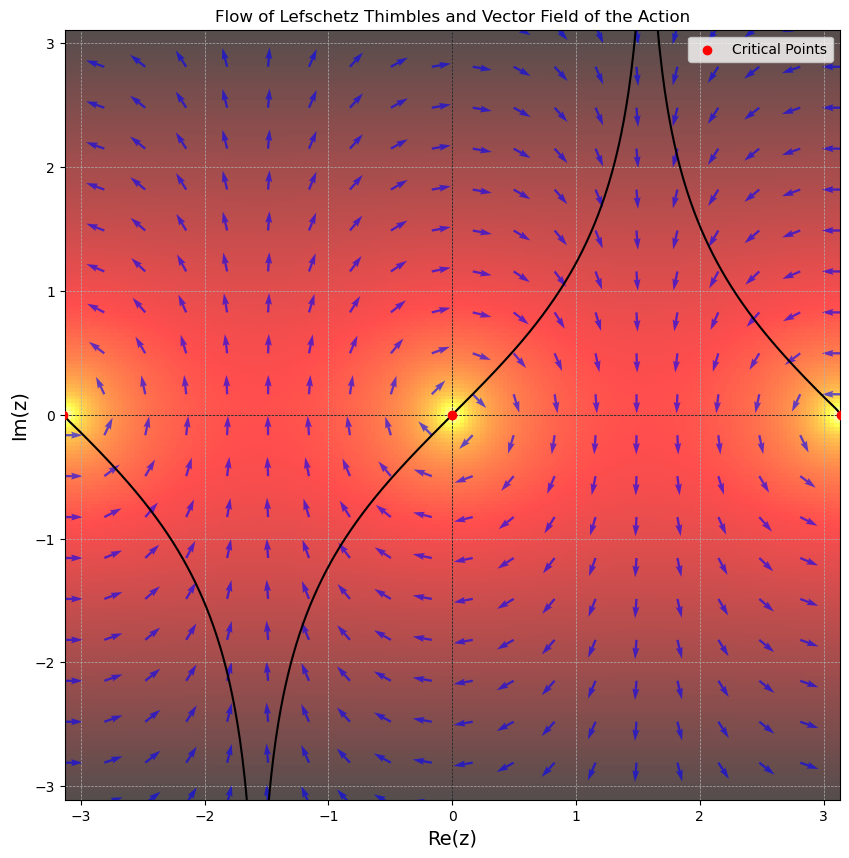

In [47]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def S(z, beta = 1):
    """Action S(z) = 1/2 * sigma * z^2 + interaction / 4 * z^4"""
    return beta * 1j * np.cos(z)

def S_prime(z, beta=1):
    """Derivative of the action with respect to z."""
    return -beta * 1j * np.sin(z)

def crit_points():
    """Find the critical points of the action."""
    cp0 = -np.pi
    cp1 = 0
    cp2 = +np.pi
    return np.array([cp0, cp1, cp2])

def flow_equation(t, z, beta = 1):
    """The flow equation dz/dt = conjugate(S'(z))"""
    dz_dt = np.conj(S_prime(z, beta))
    return dz_dt

critical_points = crit_points()
epsilon = 0.001*1j

t_span = (0, 10)  # Integrate from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 1000)

x_range = (-np.pi, np.pi)
y_range = (-np.pi, np.pi)

fig = plt.figure(figsize=(10, 10))
for idx, cp in enumerate(critical_points):
    for perturb in [+epsilon, -epsilon]:
        z0 = cp + perturb
        solution = solve_ivp(flow_equation, t_span, [z0], t_eval=t_eval, method="RK45")
        z_values = solution.y[0]
        plt.plot(z_values.real, z_values.imag, color='black')
plt.scatter(critical_points.real, critical_points.imag, color='red', zorder=5, label="Critical Points")



x = np.linspace(*x_range, 20)
y = np.linspace(*y_range, 20)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
S_values = S_prime(Z)

U = np.real(S_values)
V = np.imag(S_values)
mags = np.abs(S_values)*2
plt.quiver(X, Y, U/mags, V/mags, color="blue", angles="xy", scale=20, alpha=0.6)

x = np.linspace(*x_range, 200)
y = np.linspace(*y_range, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
S_prime_values = S_prime(Z)

mags = np.abs(S_prime_values)
plt.imshow(-np.log10(mags), extent=[*x_range, *y_range], origin='lower', cmap='hot', alpha=0.7)


# Plot details
plt.title('Flow of Lefschetz Thimbles and Vector Field of the Action')
plt.xlabel('Re(z)', fontsize=14)
plt.ylabel('Im(z)', fontsize=14)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axis("equal")
plt.legend(loc='upper right')

plt.xlim(*(val * 0.99 for val in x_range))
plt.ylim(*(val * 0.99 for val in y_range))
plt.show()

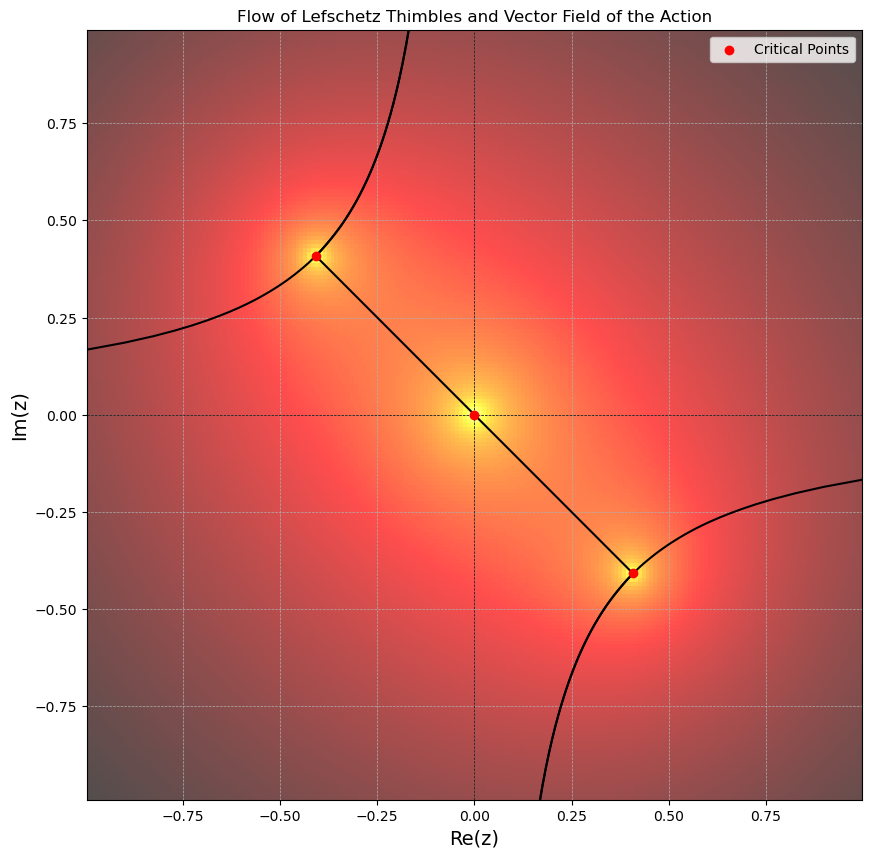

In [87]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def S(z, sigma=4j, interaction=2*6):
    """Action S(z) = 1/2 * sigma * z^2 + interaction / 4 * z^4"""
    return 1/2 * sigma * z**2 + interaction / 4 * z**4

def S_prime(z, sigma=4j, interaction=2*6):
    """Derivative of the action with respect to z."""
    return sigma * z + interaction * z**3

def crit_points(sigma, interaction):
    """Find the critical points of the action."""
    cp0 = -np.sqrt(-sigma / interaction)
    cp1 = 0
    cp2 = +np.sqrt(-sigma / interaction)
    return np.array([cp0, cp1, cp2])

def flow_equation(t, z, sigma, interaction):
    """The flow equation dz/dt = conjugate(S'(z))"""
    dz_dt = np.conj(S_prime(z, sigma, interaction))
    return dz_dt


sigma, interaction = 4j, 12


critical_points = crit_points(sigma, interaction)
epsilon = 0.001*1j

t_span = (0, 10)  # Integrate from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 1000)

x_range = (-1, 1)
y_range = (-1, 1)

fig = plt.figure(figsize=(10, 10))
for idx, cp in enumerate(critical_points):
    for perturb in [+epsilon, -epsilon]:
        z0 = cp + perturb
        solution = solve_ivp(flow_equation, t_span, [z0], args=(sigma, interaction), t_eval=t_eval, method="RK45")
        z_values = solution.y[0]
        plt.plot(z_values.real, z_values.imag, color='black')
plt.scatter(critical_points.real, critical_points.imag, color='red', zorder=5, label="Critical Points")


S_prime_values = S_prime(Z)

x = np.linspace(*x_range, 20)
y = np.linspace(*y_range, 20)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
S_values = S(Z)

U = np.real(S_values)
V = np.imag(S_values)
mags = np.abs(S_values)*2
plt.quiver(X, Y, U/mags, V/mags, color="blue", angles="xy", scale=20, alpha=0.)

x = np.linspace(*x_range, 200)
y = np.linspace(*y_range, 200)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
S_values = -S_prime(Z)

mags = np.abs(S_values)
plt.imshow(-np.log10(mags), extent=[*x_range, *y_range], origin='lower', cmap='hot', alpha=0.7)


# Plot details
plt.title('Flow of Lefschetz Thimbles and Vector Field of the Action')
plt.xlabel('Re(z)', fontsize=14)
plt.ylabel('Im(z)', fontsize=14)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axis("equal")
plt.legend(loc='upper right')
plt.xlim(*(val * 0.99 for val in x_range))
plt.ylim(*(val * 0.99 for val in y_range))
plt.show()

In [23]:
np.linspace(0, 2*np.pi, 5)[:-1]

array([0.        , 1.57079633, 3.14159265, 4.71238898])

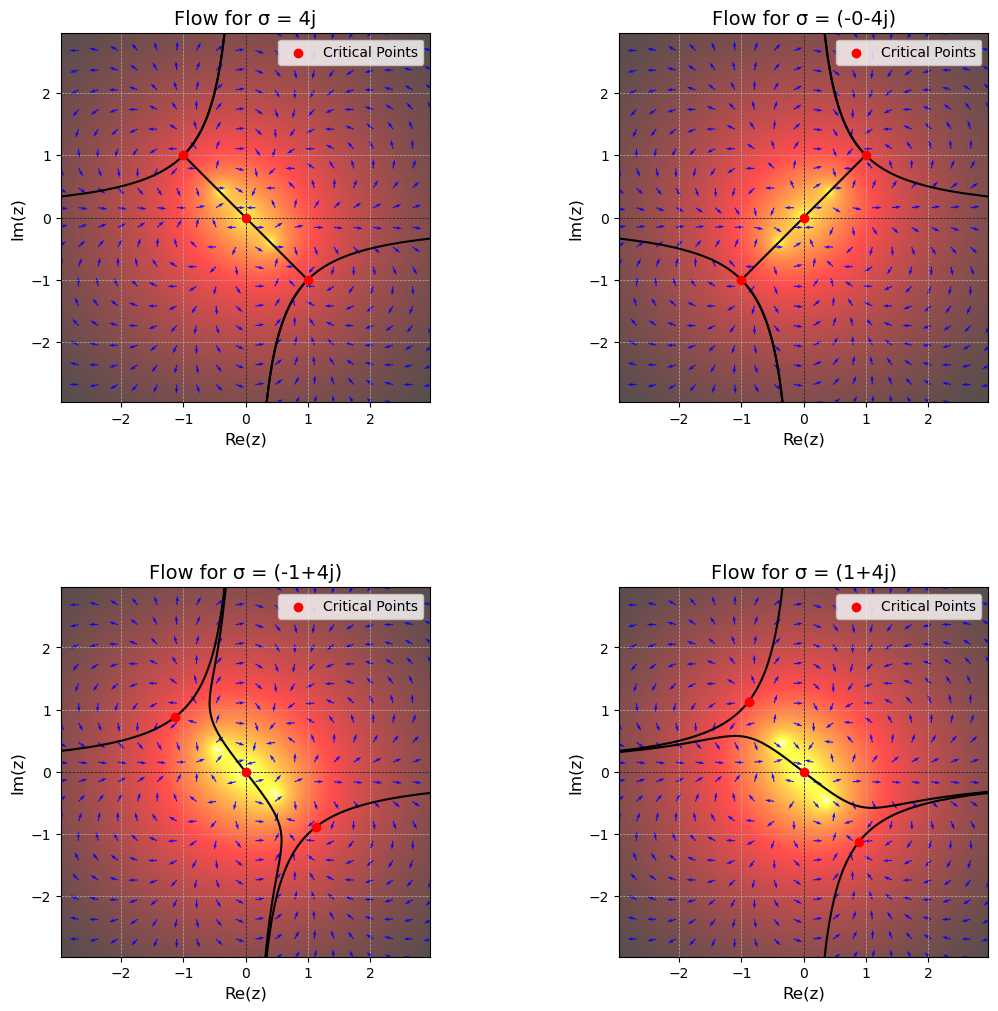

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def S(z, sigma=4j, interaction=2*6):
    """Action S(z) = 1/2 * sigma * z^2 + interaction / 4 * z^4"""
    return 1/2 * sigma * z**2 + interaction / 4 * z**4

def S_prime(z, sigma=4j, interaction=2*6):
    """Derivative of the action with respect to z."""
    return sigma * z + interaction * z**3

def crit_points(sigma, interaction):
    """Find the critical points of the action."""
    cp0 = -np.sqrt(-sigma / interaction)
    cp1 = 0
    cp2 = +np.sqrt(-sigma / interaction)
    return np.array([cp0, cp1, cp2])

def flow_equation(t, z, sigma, interaction):
    """The flow equation dz/dt = conjugate(S'(z))"""
    dz_dt = np.conj(S_prime(z, sigma, interaction))
    return dz_dt

# Set the values of interaction and sigma values
interaction = 2

sigma_values = 4*np.array([np.cos(np.radians(angle) + 0.005) + 1j * np.sin(np.radians(angle) + 0.005) for angle in np.linspace(0, 270, 4)])
sigma_values = [4j, -4j, 4j-1, 4j+1]

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots

epsilon = 0.001 * (1j)

t_span = (0, 10)  # Integrate from t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 1000)

x_range = (-3, 3)
y_range = (-3, 3)

# Loop through each sigma value and corresponding subplot
for sigma, ax in zip(sigma_values, axes):
    critical_points = crit_points(sigma, interaction)
    
    # Plot the flow of Lefschetz Thimbles
    for cp in critical_points:
        for perturb in [+epsilon, -epsilon]:
            z0 = cp + perturb
            solution = solve_ivp(flow_equation, t_span, [z0], args=(sigma, interaction), t_eval=t_eval, method="RK45")
            z_values = solution.y[0]
            ax.plot(z_values.real, z_values.imag, color='black')
    
    # Scatter plot the critical points
    ax.scatter(critical_points.real, critical_points.imag, color='red', zorder=5, label="Critical Points")
    
    # Create the vector field of the action
    x = np.linspace(*x_range, 20)
    y = np.linspace(*y_range, 20)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    S_values = S(Z, sigma=sigma)
    U = np.real(S_values)
    V = np.imag(S_values)
    mags = np.abs(S_values) * 2
    ax.quiver(X, Y, U/mags, V/mags, color="blue", angles="xy", scale=20, alpha=0.9)

    # Add background heatmap for S_prime values
    x = np.linspace(*x_range, 200)
    y = np.linspace(*y_range, 200)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    S_values = S_prime(Z, sigma=sigma)
    mags = np.abs(S_values)
    ax.imshow(-np.log10(mags), extent=[*x_range, *y_range], origin='lower', cmap='hot', alpha=0.7)

    # Set plot details for each subplot
    ax.set_title(f'Flow for σ = {np.round(sigma, decimals=2)}', fontsize=14)
    ax.set_xlabel('Re(z)', fontsize=12)
    ax.set_ylabel('Im(z)', fontsize=12)
    ax.axhline(0, color="black", linewidth=0.5, linestyle="--")
    ax.axvline(0, color="black", linewidth=0.5, linestyle="--")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')
    ax.legend(loc='upper right')

    ax.set_xlim(*(val * 0.99 for val in x_range))
    ax.set_ylim(*(val * 0.99 for val in y_range))

plt.show()